In [16]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from copy import deepcopy
from math import pi, sqrt

from points_Interpolation import Interpolate

In [17]:


def plot_curve (func, axe: 'plt.Axes', interval_x: list, interval_y: list,
                step: float = 0.1, color_val: str = 'b', label_txt: str = '') -> None:        
    
    x_np = np.arange(*interval_x, step)

    axe.set(xlim= interval_x, ylim = interval_y)
    
    axe.plot(x_np, func(x_np), color=color_val, label=label_txt)

def plot_points (x_coordinates: list, y_coordinates: list, axe: 'plt.Axes',
                 marker:str = '.', color_val: str='black', label_txt: str = ''):
    
    axe.scatter (x_coordinates, y_coordinates, marker=marker,
                 color = color_val, label = label_txt )
    
def intervals (x_coordinates: list, y_coordinates: list) -> list:


    max_x, max_y = max(x_coordinates), max(y_coordinates)

    min_x, min_y = min(x_coordinates), min(y_coordinates)

    increment_x = ((max_x - min_x)/len(x_coordinates)) * 0.75
    increment_y = ((max_y - min_y)/len(y_coordinates)) * 0.75

    x_interval = [min_x - increment_x, max_x + increment_x]
    y_interval = [min_y - increment_y, max_y + increment_y]

    return [x_interval, y_interval]


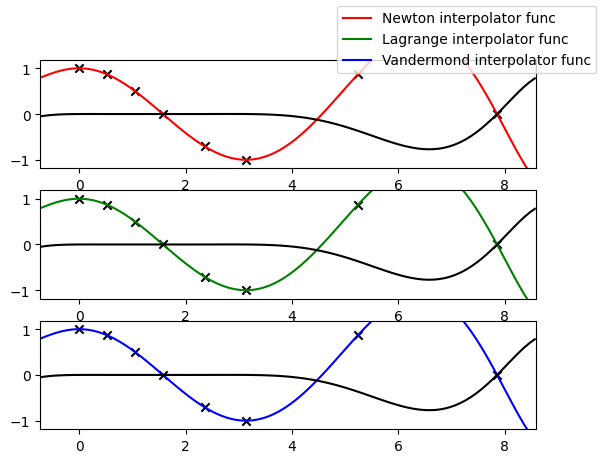

In [18]:
    
points_1 = [
    (0, 1),
    (1, 6),
    (2, 5),
    (3, -8),
]

points_2 = [
    (-1, 1.6988),
    (-0.4, 1.6916),
    (-0.2, 1.8214),
    (0, 2),
    (0.3, 2.3408),
    (1, 3.3817),
]

points_3 = [
    (0, 1), (pi/6, 0.866025), (pi/3, 0.5), (pi/2, 0), (pi, -1),
    (3*pi/4, -0.7071067811865), (5*pi/3, 0.866025),
    (5*pi/2, 0),
]

interpolator = Interpolate(points_3)

vandermond_func = interpolator.vandermond_method()
lagrange_func = interpolator.lagrange_method()
newton_func = interpolator.newton_method()

funcs = [newton_func, lagrange_func, newton_func]

fig, axe = plt.subplots(3)

interval_x, interval_y = intervals(interpolator.x_values, interpolator.y_values)


plot_curve(newton_func, axe[0], interval_x, interval_y, color_val='r', label_txt='Newton interpolator func')
plot_points(interpolator.x_values, interpolator.y_values, axe[0], marker='x')

plot_curve(lagrange_func, axe[1], interval_x, interval_y, color_val='green', label_txt='Lagrange interpolator func')
plot_points(interpolator.x_values, interpolator.y_values, axe[1], marker='x')

plot_curve(vandermond_func, axe[2], interval_x, interval_y, color_val='blue', label_txt='Vandermond interpolator func')
plot_points(interpolator.x_values, interpolator.y_values, axe[2], marker='x')

def error (func_ref, func_inter, x):
    return  func_ref(x) - func_inter(x)


x_np = np.arange(*interval_x, 0.1)

for i, axis in enumerate(axe):
    axis.plot(x_np, error(np.cos, funcs[i], x_np), color='black')



fig.legend()

